## EEC 206 Lab 1

Rahul Krishnamoorthy, Spencer Bagga

#Mount the Google Drive

In [ ]:
from google.colab import drive #module required to mount the google drive
drive.mount('/content/gdrive') #mounting the google drive to access the images

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Importing Libraries and Input Image

Input image:


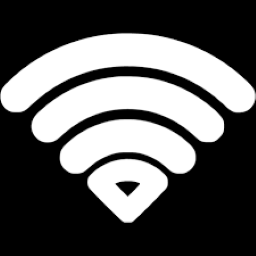

In [ ]:
import cv2 #module to import the images
import numpy as np #module for matrix operations
from google.colab.patches import cv2_imshow #google colab's patch for dispplaying images
import time #module to display the time taken to run program
path = '/content/gdrive/My Drive/wifi.png' #Enter the path to the image here
in_image = cv2.imread(path, 0) #Read the image in grayscale
print("Input image:")
cv2_imshow(in_image) #Displays image

#Component Clustering Function

In [ ]:
def ccGroup(in_image):
  prev_cluster = 0 #records the number of clusters during the first pass
  equal_max = np.array([]) #numpy array to store the max value during conflict
  equal_min = np.array([]) #numpy array to store the min value during conflict
  in_image[in_image<255] = 0 #thresholding the image to make it binary
  padded = np.pad(in_image,[(1,1),(1,1)],mode='constant') #pad the image on all four sides
  mat = np.zeros((padded.shape)) #creating the matrix to store the clusters of each object in the image having the same shape as the image
  for i in range(1,padded.shape[0]):
    for j in range(1,padded.shape[1]): #looping through each row and column
      if padded[i][j] == 255: #only when the image pixels are white
        if mat[i][j-1] == 0 and mat[i-1][j]==0 and mat[i-1][j-1]==0 and mat[i-1][j+1]==0: #looking whether there are any existing clusters in the top left, top, top right and to the left of the current pixel.
          prev_cluster = prev_cluster + 1 #in that case, increment the cluster number by one.
          mat[i][j] = prev_cluster #plug in the new cluster number for the current pixel
        elif mat[i][j-1]!=0: #if there is an existing cluster to the left of current pixel
          if mat[i-1][j]!=0 and mat[i][j-1]!=mat[i-1][j]: #Also check if there are non zero elements to the top of the current pixel and check if they both are not equal
            index = np.array(np.where(equal_max==min(mat[i][j-1],mat[i-1][j]))) #getting the index of the minimum of the two values in the max array.
            if index.size!=0: #if it is not empty
              mat[i][j] = min(mat[i][j-1],mat[i-1][j]) #append the minimum of the two for the current pixel
              equal_max = np.append(equal_max,max(mat[i][j-1],mat[i-1][j])) #append the max element in the max_array
              index = np.where(equal_max==min(mat[i][j-1],mat[i-1][j]))[0][0] #finding the first occurance of the minimum of two in the max_array
              equal_min = np.append(equal_min,equal_min[index]) #Appending the corresponding min element to the max element found previously
            else: #if there are no such indices in the max_array.
              mat[i][j] = min(mat[i][j-1],mat[i-1][j]) #append the minimum of the two as the current pixel's cluster
              equal_max = np.append(equal_max,max(mat[i][j-1],mat[i-1][j])) #append the maximum of the two in the max array
              equal_min = np.append(equal_min,min(mat[i][j-1],mat[i-1][j])) #append the minimum of the two in the min array
          elif mat[i-1][j+1]!=0 and mat[i][j-1]!=mat[i-1][j+1]: #Performin the same steps for the left and top right pixels
            index = np.array(np.where(equal_max==min(mat[i][j-1],mat[i-1][j+1])))
            if index.size!=0:
              mat[i][j] = min(mat[i][j-1],mat[i-1][j+1])
              equal_max = np.append(equal_max,max(mat[i][j-1],mat[i-1][j+1]))
              index = np.where(equal_max==min(mat[i][j-1],mat[i-1][j+1]))[0][0]
              equal_min = np.append(equal_min,equal_min[index])
            else:
              mat[i][j] = min(mat[i][j-1],mat[i-1][j+1])
              equal_max = np.append(equal_max,max(mat[i][j-1],mat[i-1][j+1]))
              equal_min = np.append(equal_min,min(mat[i][j-1],mat[i-1][j+1]))
          else: #if the left pixel is the ony non zero element
            mat[i][j] = mat[i][j-1]
        elif mat[i-1][j]!=0: #if the top pixel is non zero
          if mat[i-1][j+1]!=0 and mat[i-1][j]!=mat[i-1][j+1]: #same procedure as above for top and top right pixels
            index = np.array(np.where(equal_max==min(mat[i-1][j],mat[i-1][j+1])))
            if index.size!=0:
              mat[i][j] = min(mat[i-1][j],mat[i-1][j+1])
              equal_max = np.append(equal_max,max(mat[i-1][j],mat[i-1][j+1]))
              index = np.where(equal_max==min(mat[i-1][j],mat[i-1][j+1]))[0][0]
              equal_min = np.append(equal_min,equal_min[index])
            else:
              mat[i][j] = min(mat[i-1][j],mat[i-1][j+1])
              equal_max = np.append(equal_max,max(mat[i-1][j],mat[i-1][j+1]))
              equal_min = np.append(equal_min,min(mat[i-1][j],mat[i-1][j+1]))
          else:
            mat[i][j] = mat[i-1][j]
        elif mat[i-1][j-1]!=0: #if the top left pixel is non zero
          mat[i][j] = mat[ji-1][j-1]
        elif mat[i-1][j+1]!=0: #if the top right pixel is non zero
          mat[i][j] = mat[i-1][j+1]
  equal_max = np.flip(equal_max) #flip the array to get the  last element first
  equal_min = np.flip(equal_min) #flip the array to get the last element first
  vals = np.unique(mat) #finds the number of unique elements in the list
  for _ in range(len(vals)-1): #do the same process as the number of unique elements
    for i in range(len(equal_max)): #for all the elements in the equal_max
      mat[mat==equal_max[i]] = equal_min[i] #replaceing the elements in the max array with the corrsponding elements in the min array
  i=1
  vals = np.unique(mat) #find the number of unique elements
  n = len(vals)-1 #n gives the number of clusters. 1 is subtracted to exclude the value 0
  x = int(255/n)
  while i<len(vals): #for all the clusters
    mat[mat==vals[i]] = x*i #provide different shades of gray
    i=i+1
  out_img = mat
  return n, out_img #return the number of clusters and the output image

#Display Results

Number of clusters:  4
Output Image:


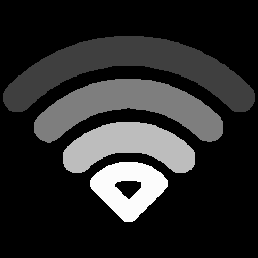

Time taken to run:  5.404040336608887  seconds


In [ ]:
start_time = time.time() #start the timer
n, out_img = ccGroup(in_image) #run the ccGroup function to get the number of clusters and the output image
print("Number of clusters: ",n)
print("Output Image:")
cv2_imshow(out_img) #diplaay the image
print("Time taken to run: ",time.time()-start_time, " seconds") #record the time taken to run the program